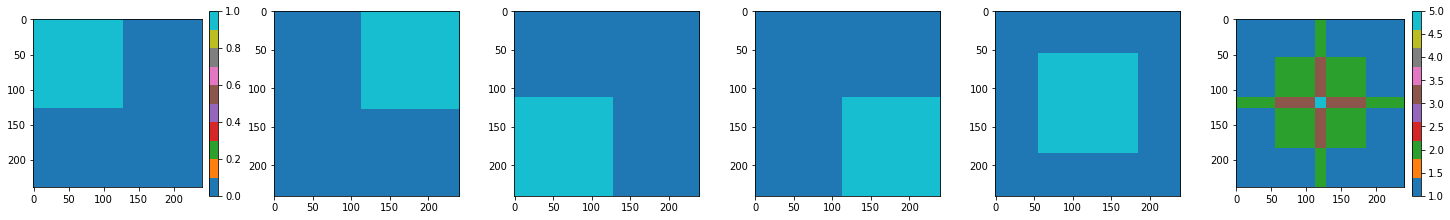

In [69]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

x = 240
y = 240

cropx = 128
cropy = 128

data = np.zeros((240,240))
data[0:cropx, 0:cropy] = 1
tl = data

data = np.zeros((240,240))
data[0:cropx, y-cropy:y] = 1
tr = data

data = np.zeros((240,240))
data[x-cropx:x, 0:cropy] = 1
bl = data

data = np.zeros((240,240))
data[x-cropx:x, y-cropy:y] = 1
br = data

data = np.zeros((240,240))
startx = x//2-(cropx//2)
starty = y//2-(cropy//2)    
data[starty:starty+cropy,startx:startx+cropx] = 1
cc = data

data = np.zeros((240,240))
five_patch_divisor = tl + tr + bl + br + cc

fig, axes = plt.subplots(1, 6, figsize=(20, 20))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.3)
tl_fig = axes[0].imshow(tl, cmap='tab10', interpolation='nearest')
axes[1].imshow(tr, cmap='tab10', interpolation='nearest')
axes[2].imshow(bl, cmap='tab10', interpolation='nearest')
axes[3].imshow(br, cmap='tab10', interpolation='nearest')
axes[4].imshow(cc, cmap='tab10', interpolation='nearest')
five_patches_fig = axes[5].imshow(five_patch_divisor, cmap='tab10', interpolation='nearest')

fig.colorbar(tl_fig, ax=axes[0], fraction=0.05, pad=0.04)
fig.colorbar(five_patches_fig, ax=axes[5], fraction=0.05, pad=0.04)


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def get_edges_points(cube_definition):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]
    return points, edges

def plot_outer_cube(ax, x=240, y=240, z=144):

    cube_definition = [(0,0,0), (x,0,0), (0,y,0), (0,0,z)]
    points, edges = get_edges_points(cube_definition)

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,1,1,0.2))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)
    
    return ax
    
def plot_cube(cube_definition, ax, linewidth=2, alpha=0.2): 
    plot_outer_cube(ax)
    
    points, edges = get_edges_points(cube_definition)

    
    faces = Poly3DCollection(edges, linewidths=linewidth, edgecolors='r')
    faces.set_facecolor((0,0,1,alpha))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)
    ax.set_ylim([0, 300])
    ax.set_xlim([0, 300])
    ax.set_zlim([0, 200])

def plot_cube_9patches(all_cube_definitions, ax):
    
    plot_outer_cube(ax)

#    for cube_definition, edgecolor in zip(all_cube_definitions, ['r', 'g', 'b', 'c', 'm', 'y','k']):
    for cube_definition in all_cube_definitions:
        points, edges = get_edges_points(cube_definition)
        faces = Poly3DCollection(edges, linewidths=2, edgecolors='r')
        faces.set_facecolor((0,0,1,0.2))

        ax.add_collection3d(faces)

        # Plot the points themselves to force the scaling of the axes
        ax.scatter(points[:,0], points[:,1], points[:,2], s=0)
        ax.set_ylim([0, 300])
        ax.set_xlim([0, 300])
        ax.set_zlim([0, 200])


    
   # ax.set_aspect('equal')

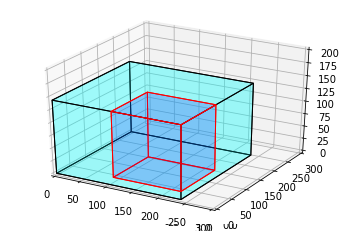

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax = fig.add_subplot(111, projection='3d')
cube_definition = [(x,0,z), (x-cropx,0,z), (x,y-cropy,z), (x,0,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax, linewidth=1, alpha=0.1)

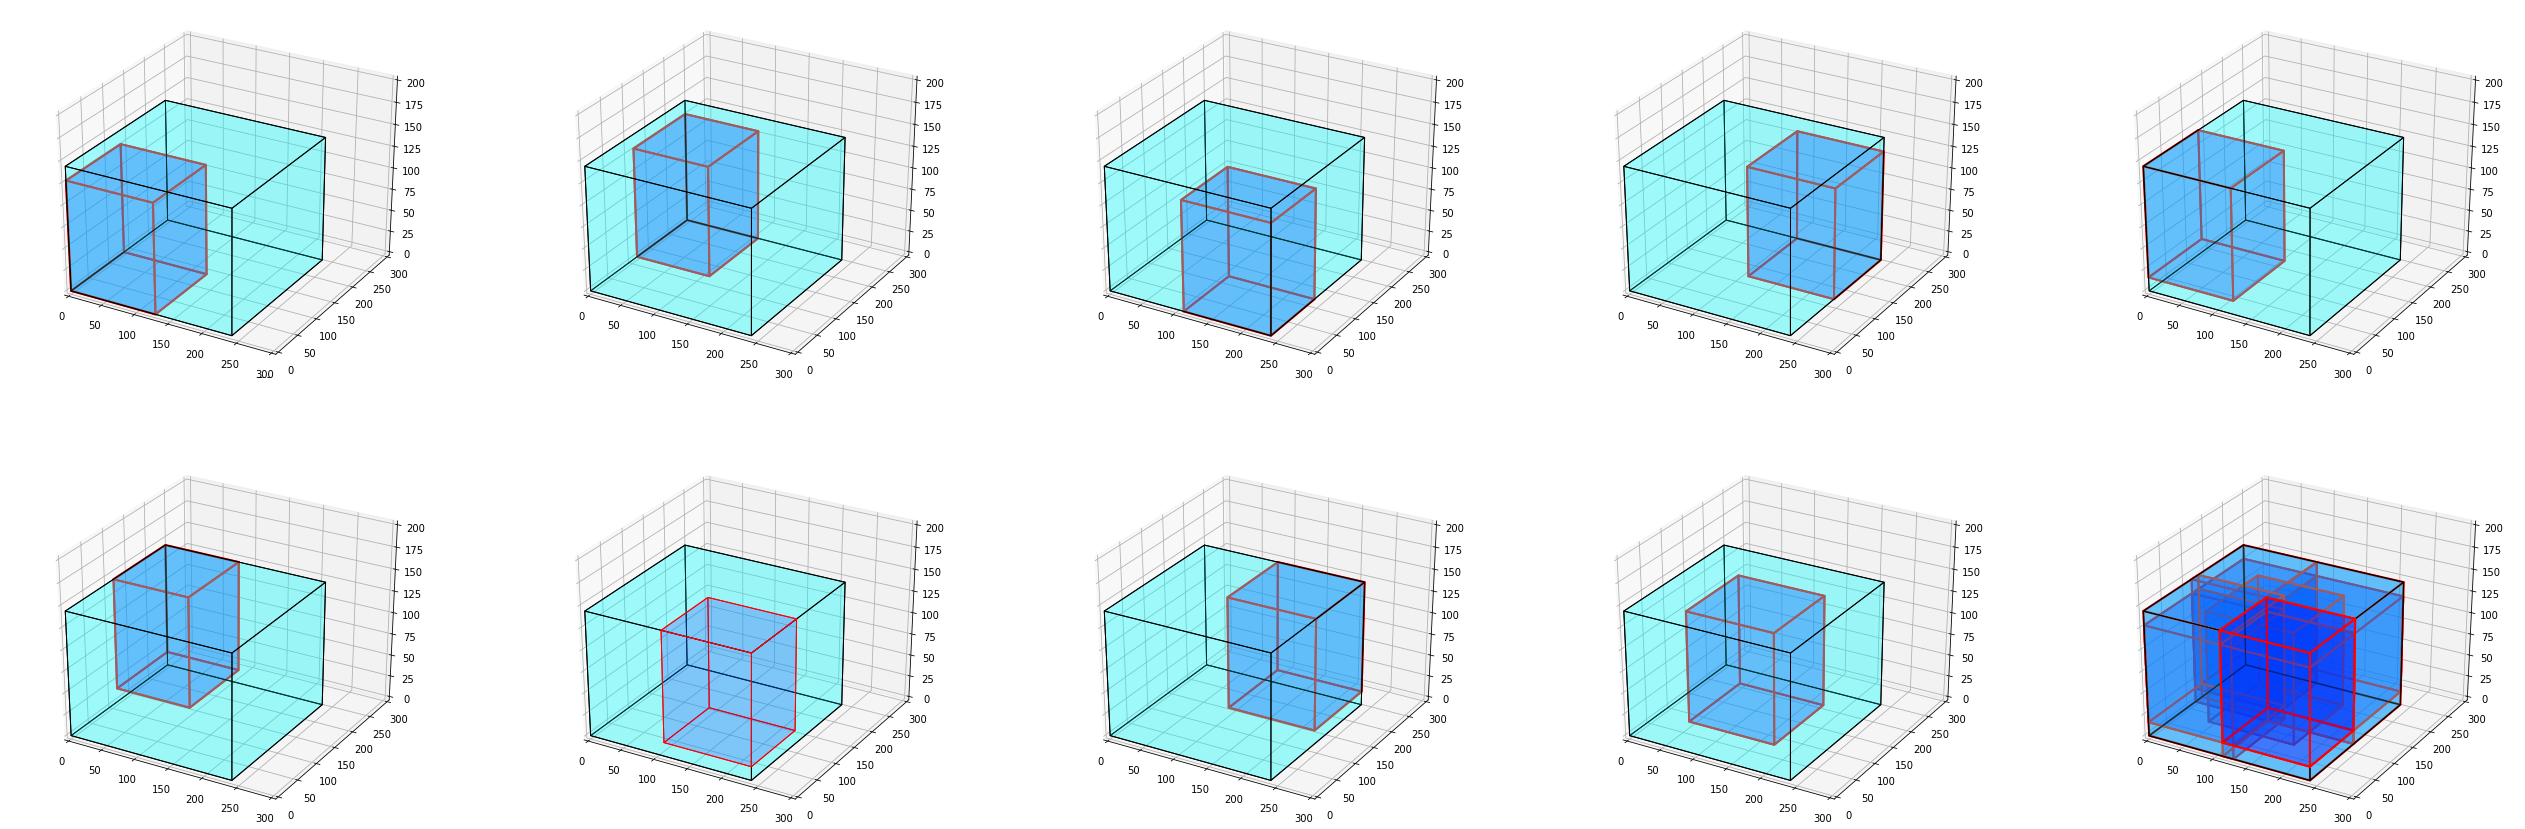

In [149]:
cropx = 128
cropy = 128
cropz = 128

# if changed, also change in plot_outer_cube function
x = 240
y = 240
z = 144

'''
Top (T)    -  Front (F)  - Right(R)
Bottom (B) -  Back (B)   - Left(L)
'''

fig = plt.figure(figsize=(45, 15))
ax = fig.add_subplot(251, projection='3d')

all_cube_definitions = []
## BOTTOM
# bfl (bottom-front-left)
ax = fig.add_subplot(251, projection='3d')
cube_definition = [(0,0,0), (cropx,0,0), (0,cropy,0), (0,0,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bbl
ax = fig.add_subplot(252, projection='3d')
cube_definition = [(0,y,0), (0,y-cropy,0), (x-cropx,y,0), (0,y,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bfr
ax = fig.add_subplot(253, projection='3d')
cube_definition = [(x,0,0), (x-cropx,0,0), (x,y-cropy,0), (x,0,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bbr
ax = fig.add_subplot(254, projection='3d')
cube_definition = [(x,y,0), (x,y-cropy,0), (x-cropx,y,0), (x,y,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

## TOP
# tfl
ax = fig.add_subplot(255, projection='3d')
cube_definition = [(0,0,z), (cropx,0,z), (0,cropy,z), (0,0,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# tbl
ax = fig.add_subplot(256, projection='3d')
cube_definition = [(0,y,z), (0,y-cropy,z), (x-cropx,y,z), (0,y,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# tfr
ax = fig.add_subplot(257, projection='3d')
cube_definition = [(x,0,z), (x-cropx,0,z), (x,y-cropy,z), (x,0,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax, linewidth=1, alpha=0.1)

# tbr
ax = fig.add_subplot(258, projection='3d')
cube_definition = [(x,y,z), (x,y-cropy,z), (x-cropx,y,z), (x,y,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# center
ax = fig.add_subplot(259, projection='3d')
startx = x//2-(cropx//2)
starty = y//2-(cropy//2)  
startz = z//2-(cropz//2)  
cube_definition = [(startx,starty,startz), (startx+cropx,starty,startz), (startx,starty+cropy,startz), (startx,starty,startz+cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# ALL 9 patches in one 
ax = fig.add_subplot(2,5,10, projection='3d')
plot_cube_9patches(all_cube_definitions, ax)

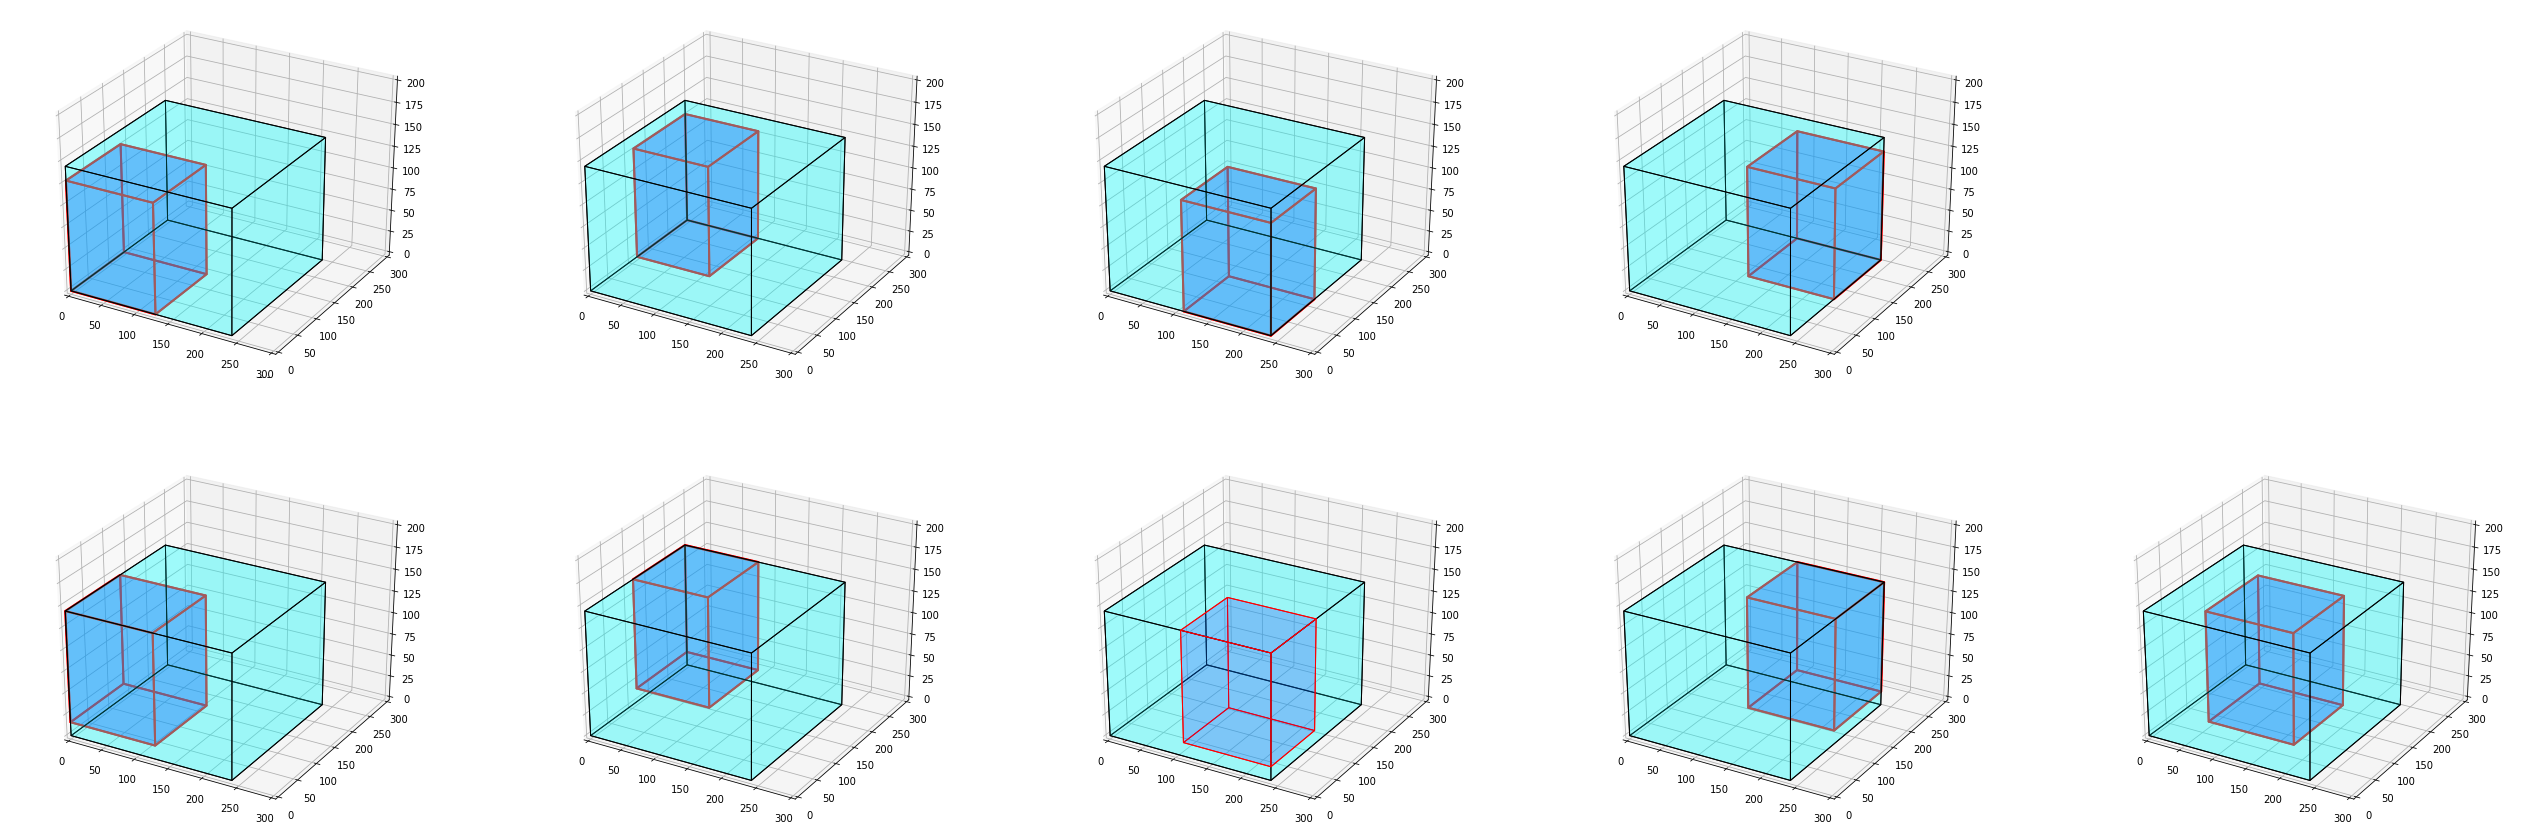

In [151]:
cropx = 128
cropy = 128
cropz = 128

# if changed, also change in plot_outer_cube function
x = 240
y = 240
z = 144

'''
Top (T)    -  Front (F)  - Right(R)
Bottom (B) -  Back (B)   - Left(L)
'''

fig = plt.figure(figsize=(45, 15))
ax = fig.add_subplot(251, projection='3d')

all_cube_definitions = []
## BOTTOM
# bfl (bottom-front-left)
ax = fig.add_subplot(251, projection='3d')
cube_definition = [(0,0,0), (cropx,0,0), (0,cropy,0), (0,0,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bbl
ax = fig.add_subplot(252, projection='3d')
cube_definition = [(0,y,0), (0,y-cropy,0), (x-cropx,y,0), (0,y,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bfr
ax = fig.add_subplot(253, projection='3d')
cube_definition = [(x,0,0), (x-cropx,0,0), (x,y-cropy,0), (x,0,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# bbr
ax = fig.add_subplot(254, projection='3d')
cube_definition = [(x,y,0), (x,y-cropy,0), (x-cropx,y,0), (x,y,cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

## TOP
# tfl
ax = fig.add_subplot(256, projection='3d')
cube_definition = [(0,0,z), (cropx,0,z), (0,cropy,z), (0,0,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# tbl
ax = fig.add_subplot(257, projection='3d')
cube_definition = [(0,y,z), (0,y-cropy,z), (x-cropx,y,z), (0,y,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# tfr
ax = fig.add_subplot(258, projection='3d')
cube_definition = [(x,0,z), (x-cropx,0,z), (x,y-cropy,z), (x,0,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax, linewidth=1, alpha=0.1)

# tbr
ax = fig.add_subplot(259, projection='3d')
cube_definition = [(x,y,z), (x,y-cropy,z), (x-cropx,y,z), (x,y,z-cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )

# center
ax = fig.add_subplot(2,5,10, projection='3d')
startx = x//2-(cropx//2)
starty = y//2-(cropy//2)  
startz = z//2-(cropz//2)  
cube_definition = [(startx,starty,startz), (startx+cropx,starty,startz), (startx,starty+cropy,startz), (startx,starty,startz+cropz)]
all_cube_definitions.append(cube_definition)
plot_cube(cube_definition, ax )



In [78]:
def get_zero_data():
    data = np.zeros((240,240,240))
    return data



In [79]:
cropx = 128
cropy = 128
cropz = 128

x = 240
y = 240
z = 155

'''
Front (F) - Top(T)     - Right(R)
Back (B)  - Bottom (B) - Left(L)
'''

data = get_zero_data()
data[0:cropx, 0:cropy, 0:cropz] = 1
fbl = data



In [80]:
data = get_zero_data()
data[0:cropx, y-cropy:y, 0:cropz] = 1
bbl = data

data = get_zero_data()
data[x-cropx:x, 0:cropy, 0:cropz] = 1
fbr = data

data = get_zero_data()
data[x-cropx:x, y-cropy:y, 0:cropz] = 1
bbr = data

## Top Plane
data = get_zero_data()
data[0:cropx, 0:cropy, z-cropz:z] = 1
ftl = data

data = get_zero_data()
data[0:cropx, y-cropy:y, z-cropz:z] = 1
btl = data

data = get_zero_data()
data[x-cropx:x, 0:cropy, z-cropz:z] = 1
ftr = data

data = get_zero_data()
data[x-cropx:x, y-cropy:y, z-cropz:z] = 1
btr = data

#Center crop
data = get_zero_data()
startx = x//2-(cropx//2)
starty = y//2-(cropy//2)  
startz = z//2-(cropz//2)  
data[startx:startx+cropx, starty:starty+cropy, startz:startz+cropz] = 1
cc = data


#return tl + tr + bl + br + cc

ValueError: shape mismatch: objects cannot be broadcast to a single shape

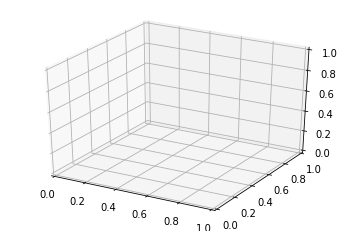

In [83]:
fbl[:,:,:].shape
fbl[:,0]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

DataAll1D = fbl
# create 2d x,y grid (both X and Y will be 2d)
X, Y = np.meshgrid(DataAll1D[:,0], DataAll1D[:,1])

# repeat Z to make it a 2d grid
Z = np.tile(DataAll1D[:,2], (len(DataAll1D[:,2]), 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='ocean')

plt.show()



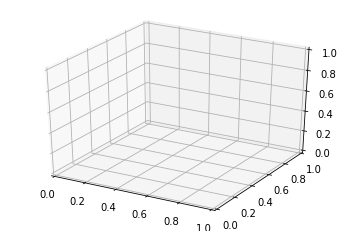

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
# Data for three-dimensional scattered points
zdata = fbl[:,:,]
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
